In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import uproot
import os
import glob
import awkward as ak
from scipy.stats import norm
plt.rcParams["xtick.top"] = True    # enable top x-ticks
plt.rcParams["ytick.right"] = True  # enable right y-ticks
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

In [2]:
data_path = "/home/haue/repositories/Masters/data/singleprotons/Al/"
bgpath =  "/home/haue/repositories/Masters/data/sorted/background"
betacut = "/home/haue/repositories/Masters/data/singleprotons/Al/thresholdedbetas"
nobetacut = "/home/haue/repositories/Masters/data/singleprotons/Al/noEcutbeta"
#outputdir = "/figure_output/"
## Load in all files from the datapath with the suffix mlio.root
Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
bgfiles = glob.glob(os.path.join(bgpath, "*.root"))

#Files to be analyzed 
Analysis_files = Al_files
nobetacut_files = glob.glob(os.path.join(betacut, "*mlio.root"))
betacut_files = glob.glob(os.path.join(nobetacut, "*mlio.root"))

upscale = 1/0.34
scale =  4.993289447838043 # ratio between total solid angle coverage and solid angle coverage of id3 to account for lack of detection of beta particles
id3scale = 100/6.795917343263473

def weighted_mean(values, errors):
    values = np.asarray(values)
    errors = np.asarray(errors)
    weights = 1.0 / (errors**2)
    mean = np.sum(weights * values) / np.sum(weights)
    err_mean = np.sqrt(1.0 / np.sum(weights))
    return mean, err_mean

In [3]:

Eb1 = np.array([])
for batch in uproot.iterate(betacut_files, expressions=["E"],
            cut=f"(pb)"):
    Eb1 = np.append(Eb1, ak.flatten(batch.E))
E1 = np.array([])
for batch in uproot.iterate(betacut_files, expressions=["E"]):
    E1 = np.append(E1, ak.flatten(batch.E))
    
Eb2 = np.array([])
for batch in uproot.iterate(nobetacut_files, expressions=["E"],
            cut=f"(pb)"):
    Eb2 = np.append(Eb2, ak.flatten(batch.E))
E2 = np.array([])
for batch in uproot.iterate(nobetacut_files, expressions=["E"]):
    E2 = np.append(E2, ak.flatten(batch.E))

43133 (208)   564 (24)    1.308 (0.055)
2239 (47)   37 (6)    1.653 (0.274)
9153 (96)   133 (12)    1.453 (0.127)

The deduced beta efficiency of id3 is 1.342(50)


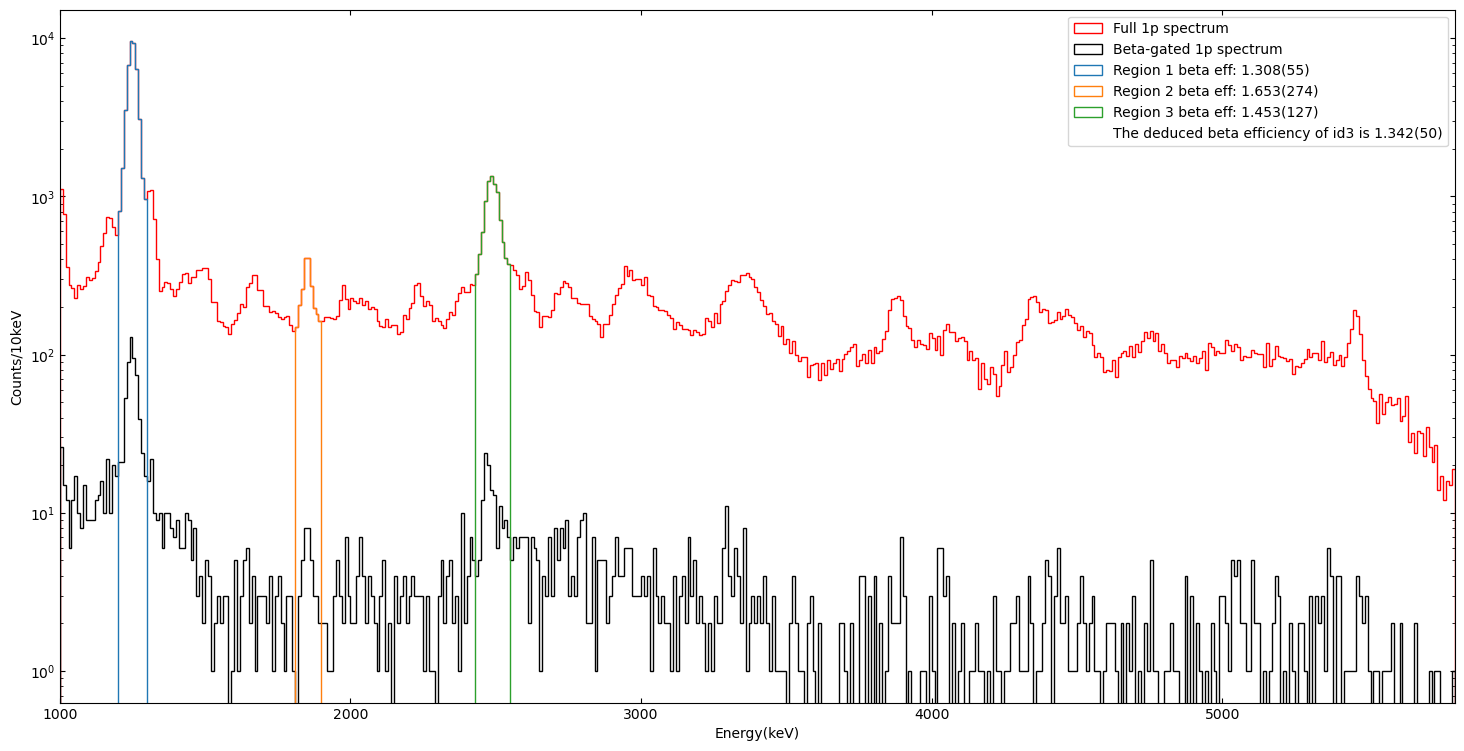

In [6]:
plt.figure(figsize=(18,9))
plt.hist(E1, bins=np.arange(1000,5800+10, 10), histtype='step', color='r', label="Full 1p spectrum")
plt.hist(Eb1, bins=np.arange(1000,5800+10, 10), histtype='step', color='k', label="Beta-gated 1p spectrum")
#plt.hist(0, bins=np.arange(-1000,-900,1), label="Zones ")
intervals = [(1200,1300), (1810,1900),(2430,2550)]
i = 0
effs = []; effs_err = []
for inter in intervals:
    ys, xs = np.histogram(E1, bins=np.arange(inter[0],inter[1]+10,10))
    ysb, xsb = np.histogram(Eb1, bins=np.arange(inter[0],inter[1]+10,10))
    ys_err = np.sqrt(np.sum(ys))
    ysb_err = np.sqrt(np.sum(ysb))
    ys = np.sum(ys)
    ysb = np.sum(ysb)
    print(ys,f"({ys_err:.0f})  ", ysb,f"({ysb_err:.0f})   ", f"{ysb/ys*100:.3f}",f"({np.sqrt((1/ys *100)**2 * ysb_err**2+(ysb/ys**2 *100)**2 * ys_err**2):.3f})")
    effs.append(ysb/ys*100)
    effs_err.append(np.sqrt((1/ys *100)**2 * ysb_err**2+(ysb/ys**2 *100)**2 * ys_err**2))
    plt.hist(E1, bins=np.arange(inter[0],inter[1]+10, 10), histtype='step', label=f"Region {i+1} beta eff: {ysb/ys*100:.3f}({np.sqrt((1/ys *100)**2 * ysb_err**2+(ysb/ys**2 *100)**2 * ys_err**2)*1e3:.0f})")
    i+=1
plt.yscale('log')
plt.xlabel("Energy(keV)")
plt.ylabel("Counts/10keV")

print()
w,we = weighted_mean(effs,effs_err)
print(f"The deduced beta efficiency of id3 is {w:.3f}({we*1e3:.0f})")
plt.plot(-1000,1000, color='w', label=f"The deduced beta efficiency of id3 is {w:.3f}({we*1e3:.0f})")
plt.xlim(1000,5800)
plt.legend()
#plt.savefig(f"betaeff_nocut.pdf")



43140 (208)   402 (20)    0.932 (0.047)
2254 (47)   28 (5)    1.242 (0.236)
9154 (96)   99 (10)    1.081 (0.109)

The deduced beta efficiency of id3 is 0.964(42)


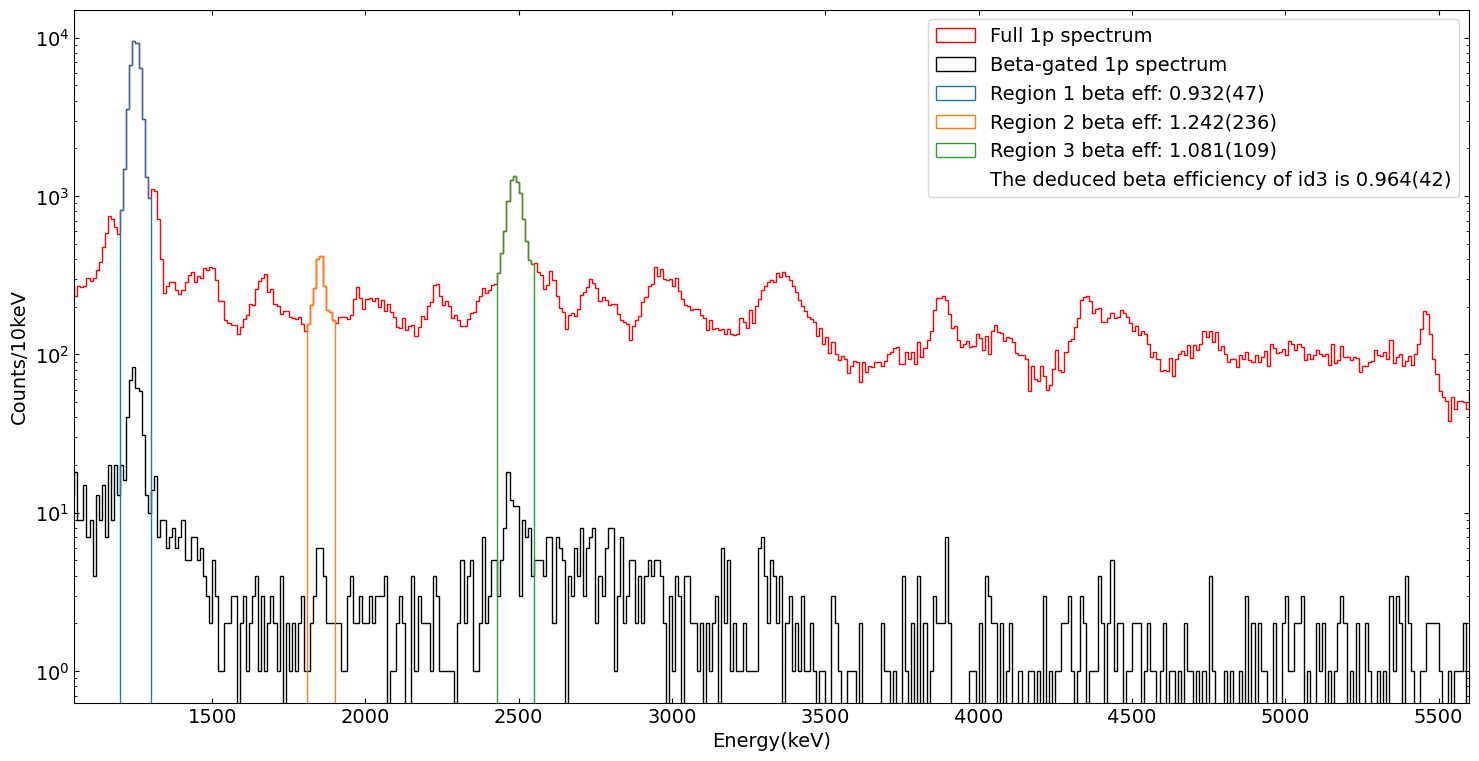

In [14]:
plt.figure(figsize=(18,9))
plt.hist(E2, bins=np.arange(1000,5800+10, 10), histtype='step', color='r', label="Full 1p spectrum")
plt.hist(Eb2, bins=np.arange(1000,5800+10, 10), histtype='step', color='k', label="Beta-gated 1p spectrum")
#plt.hist(0, bins=np.arange(-1000,-900,1), label="Zones ")
intervals = [(1200,1300), (1810,1900),(2430,2550)]
i = 0
effs = []; effs_err = []
for inter in intervals:
    ys, xs = np.histogram(E2, bins=np.arange(inter[0],inter[1]+10,10))
    ysb, xsb = np.histogram(Eb2, bins=np.arange(inter[0],inter[1]+10,10))
    ys_err = np.sqrt(np.sum(ys))
    ysb_err = np.sqrt(np.sum(ysb))
    ys = np.sum(ys)
    ysb = np.sum(ysb)
    print(ys,f"({ys_err:.0f})  ", ysb,f"({ysb_err:.0f})   ", f"{ysb/ys*100:.3f}",f"({np.sqrt((1/ys *100)**2 * ysb_err**2+(ysb/ys**2 *100)**2 * ys_err**2):.3f})")
    effs.append(ysb/ys*100)
    effs_err.append(np.sqrt((1/ys *100)**2 * ysb_err**2+(ysb/ys**2 *100)**2 * ys_err**2))
    plt.hist(E2, bins=np.arange(inter[0],inter[1]+10, 10), histtype='step', label=f"Region {i+1} beta eff: {ysb/ys*100:.3f}({np.sqrt((1/ys *100)**2 * ysb_err**2+(ysb/ys**2 *100)**2 * ys_err**2)*1e3:.0f})")
    i+=1
plt.yscale('log')
plt.xlabel("Energy(keV)", fontsize=14)
plt.ylabel("Counts/10keV", fontsize=14)
plt.xticks(np.arange(0,8000,500), fontsize=14)
plt.xlim(1050,5600)
plt.yticks(fontsize=14)

print()
w,we = weighted_mean(effs,effs_err)
print(f"The deduced beta efficiency of id3 is {w:.3f}({we*1e3:.0f})")
plt.plot(-1000,1000, color='w', label=f"The deduced beta efficiency of id3 is {w:.3f}({we*1e3:.0f})")
#plt.xlim(1000,5800)
plt.legend(fontsize=14)
plt.savefig(f"betaeff_withcut.pdf")
